# Pymaceuticals Inc.
---

### Analysis

- Ramicane and  Capomulin are the best performers, both saw an average decrease in tumor volume over time. All others exhibited an increase in average tumor volume
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
print(len(mouse_study["Mouse ID"].value_counts()))


249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["results"]=mouse_study.duplicated(['Mouse ID','Timepoint'])

mouse_dupes=mouse_study.loc[(mouse_study["results"]==True),:]
mouse_dupes



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,results
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedID=mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]
duplicatedID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,results
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study=mouse_study.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
clean_study.head(910)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,results
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
905,g867,Stelasyn,Female,9,25,5,46.880749,0,False
906,g867,Stelasyn,Female,9,25,10,48.183402,0,False
907,g867,Stelasyn,Female,9,25,15,51.060419,1,False
921,h246,Ketapril,Male,13,30,0,45.000000,0,False


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_study["Mouse ID"].value_counts()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_regimen=clean_study.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_regimen=clean_study.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_regimen=clean_study.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd_regimen=clean_study.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_regimen=clean_study.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_results=pd.DataFrame({"Mean Tumor Volume":mean_regimen,"Median Tumor Volume":median_regimen,"Tumor Volume Variance":var_regimen,
                            "Tumor Volume Std. Dev.":sd_regimen,"Tumor Volume Std. Err.":sem_regimen})
regimen_results

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_regimen=clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
agg_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

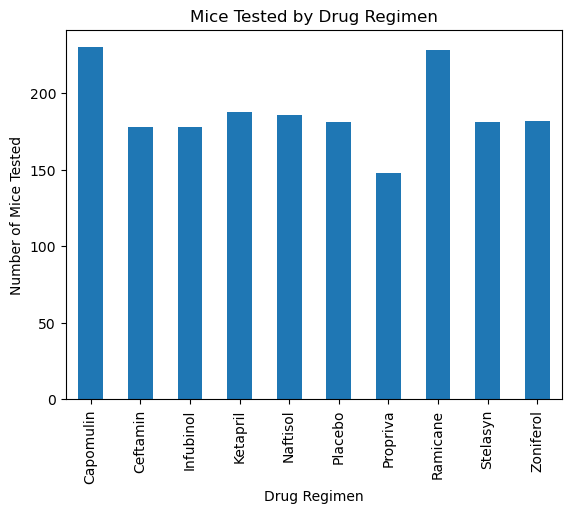

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested=clean_study.groupby("Drug Regimen").count()["Timepoint"]
mice_chart = mice_tested.plot(kind="bar", title="Mice Tested by Drug Regimen")
mice_chart.set_ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

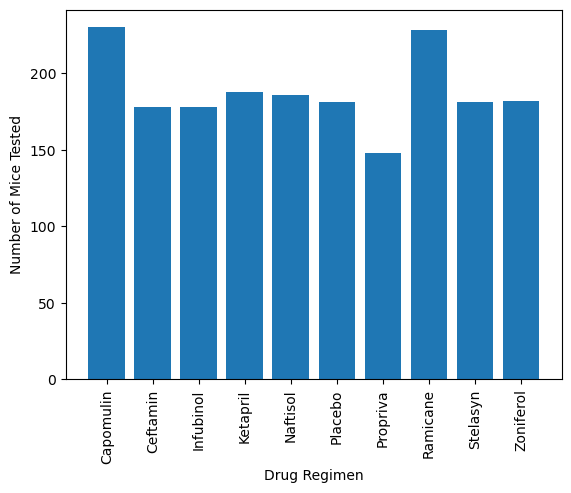

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints=clean_study.groupby("Drug Regimen").count()["Timepoint"]
x_axis=np.arange(len(timepoints))
tick_locations=[value for value in x_axis]

plt.bar(x_axis,timepoints)
plt.xticks(tick_locations, timepoints.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

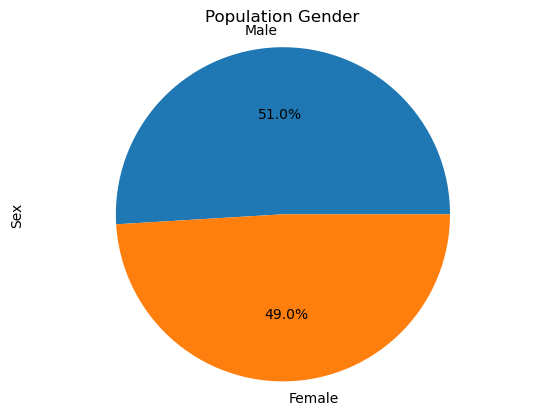

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender=clean_study["Sex"].value_counts()
mice_pie = mice_gender.plot(kind="pie", y='Sex', title= "Population Gender",autopct="%1.1f%%")
mice_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

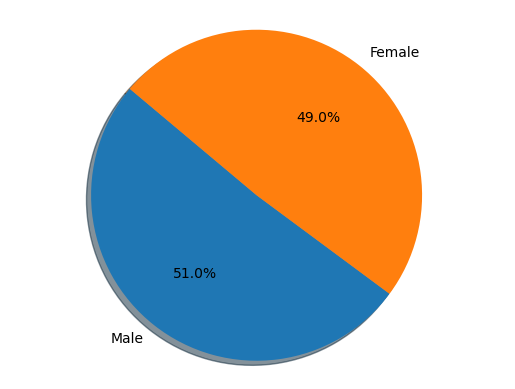

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, labels=["Male","Female"],autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=clean_study.loc[(clean_study["Drug Regimen"]=="Capomulin")|(clean_study["Drug Regimen"]=="Ramicane")|
                               (clean_study["Drug Regimen"]=="Infubinol")|(clean_study["Drug Regimen"]=="Ceftamin"),:]
last_timepoint=last_timepoint.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint.name="Last Timepoint"


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_study=pd.merge(last_timepoint,clean_study,on="Mouse ID")
final_study=last_study.loc[(last_study["Timepoint"]==last_study["Last Timepoint"]),:]
final_study=final_study.reset_index(drop=True)
final_study
final_study.head(100)

,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,results
0,a203,45,Infubinol,Female,20,23,45,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,45,65.525743,1,False
2,a275,45,Ceftamin,Female,20,28,45,62.999356,3,False
3,a411,45,Ramicane,Male,3,22,45,38.407618,1,False
4,a444,45,Ramicane,Female,10,25,45,43.047543,0,False
...,...,...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,45,68.594745,4,False
96,y793,45,Capomulin,Male,17,17,45,31.896238,2,False
97,y865,45,Ceftamin,Male,23,26,45,64.729837,3,False
98,z578,45,Ramicane,Male,11,16,45,30.638696,0,False


In [109]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
list_index=0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    volume=final_study.loc[final_study["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    tumor_vol.append(volume)
    

    # add subset 
    drug_list=tumor_vol[list_index]
    quartiles = drug_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr =upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment}'s potential outliers: {lower_bound}")
    list_index=list_index +1

Capomulin's potential outliers: 20.70456164999999
Ramicane's potential outliers: 17.912664470000003
Infubinol's potential outliers: 36.83290494999999
Ceftamin's potential outliers: 25.355449580000002


<function matplotlib.pyplot.show(close=None, block=None)>

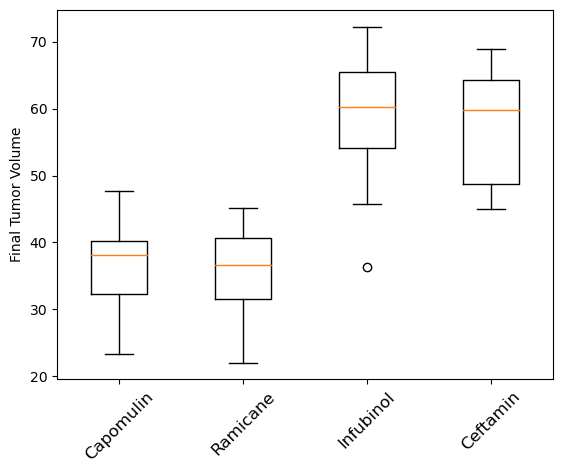

In [115]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol)
ax1.set_xticklabels(treatments,rotation=45, fontsize=12)
ax1.set_ylabel("Final Tumor Volume")

plt.show


## Line and Scatter Plots

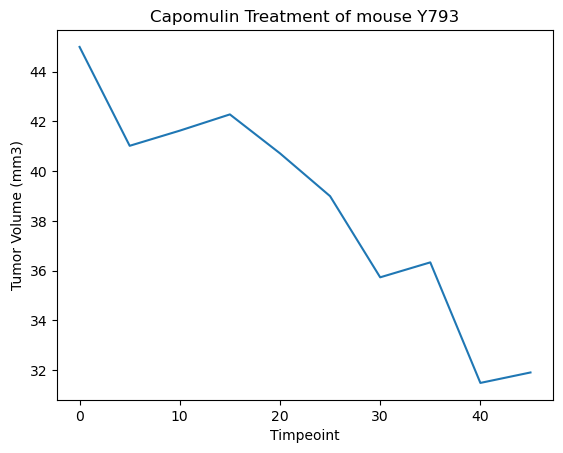

In [128]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y_axis=clean_study.loc[clean_study["Mouse ID"]=="y793",'Tumor Volume (mm3)']

x_axis=clean_study.loc[clean_study["Mouse ID"]=="y793",'Timepoint']

plt.plot(x_axis,y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timpeoint")
plt.title("Capomulin Treatment of mouse Y793")
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

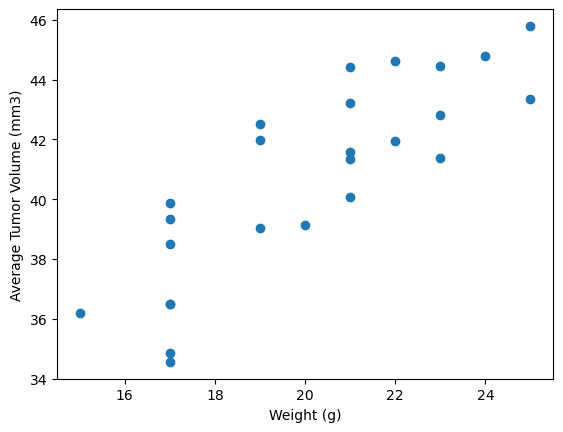

In [147]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data=clean_study.loc[clean_study["Drug Regimen"]=="Capomulin",:]
avg_volume=capomulin_data.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
weight=capomulin_data.groupby(["Mouse ID"]).mean()["Weight (g)"]
plt.scatter(weight,avg_volume,marker="o")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


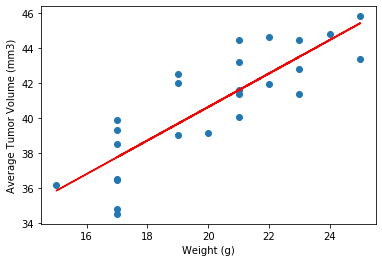

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

